In [1]:
from statistics import mean
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [9]:
actual = pd.read_csv("/Users/mz195/BTC_price_db.csv")
arima = pd.read_csv("/Users/mz195/arima_predictions.csv")
varmax = pd.read_csv("/Users/mz195/varmax_predictions.csv")
ses = pd.read_csv("/Users/mz195/ses_predictions.csv")
rf = pd.read_csv("/Users/mz195/random_forest_predictions.csv")
overall = pd.read_csv("/Users/mz195/overall_predictions.csv")

In [10]:
print("Actual:\t{}".format(actual.shape))
print("ARIMA:\t{}".format(arima.shape))
print("VARMAX:\t{}".format(varmax.shape))
print("SES:\t{}".format(ses.shape))
print("SES:\t{}".format(rf.shape))
print("SES:\t{}".format(overall.shape))

Actual:	(121, 2)
ARIMA:	(121, 2)
VARMAX:	(122, 2)
SES:	(122, 2)
SES:	(121, 2)
SES:	(121, 2)


In [11]:
arima_df = actual.merge(arima, on='time_')
arima_varmax_df = arima_df.merge(varmax, on='time_')
arima_varmax_ses_df = arima_varmax_df.merge(ses, on='time_')
arima_varmax_ses_rf_df = arima_varmax_ses_df.merge(rf, on='time_')
all_models_df = arima_varmax_ses_rf_df.merge(overall, on='time_')
all_models_df.shape

(120, 7)

In [12]:
all_models_df.head()

,time_,price_avg,arima,varmax,ses,rf,overall
0,2021-07-03 18:25:00,34644.544675,34644.941304,34651.261854,34651.595858,34674.593470,34662.721190
1,2021-07-03 18:25:30,34644.597567,34641.601713,34648.960116,34647.981354,34662.691141,34654.965322
2,2021-07-03 18:26:00,34638.477350,34641.853011,34649.664937,34647.003398,34651.855093,34648.441123
3,2021-07-03 18:26:30,34641.926300,34642.408241,34648.184391,34646.057148,34645.746607,34645.759471
4,2021-07-03 18:27:00,34646.575000,34638.710693,34643.923724,34642.164904,34642.287031,34642.693617


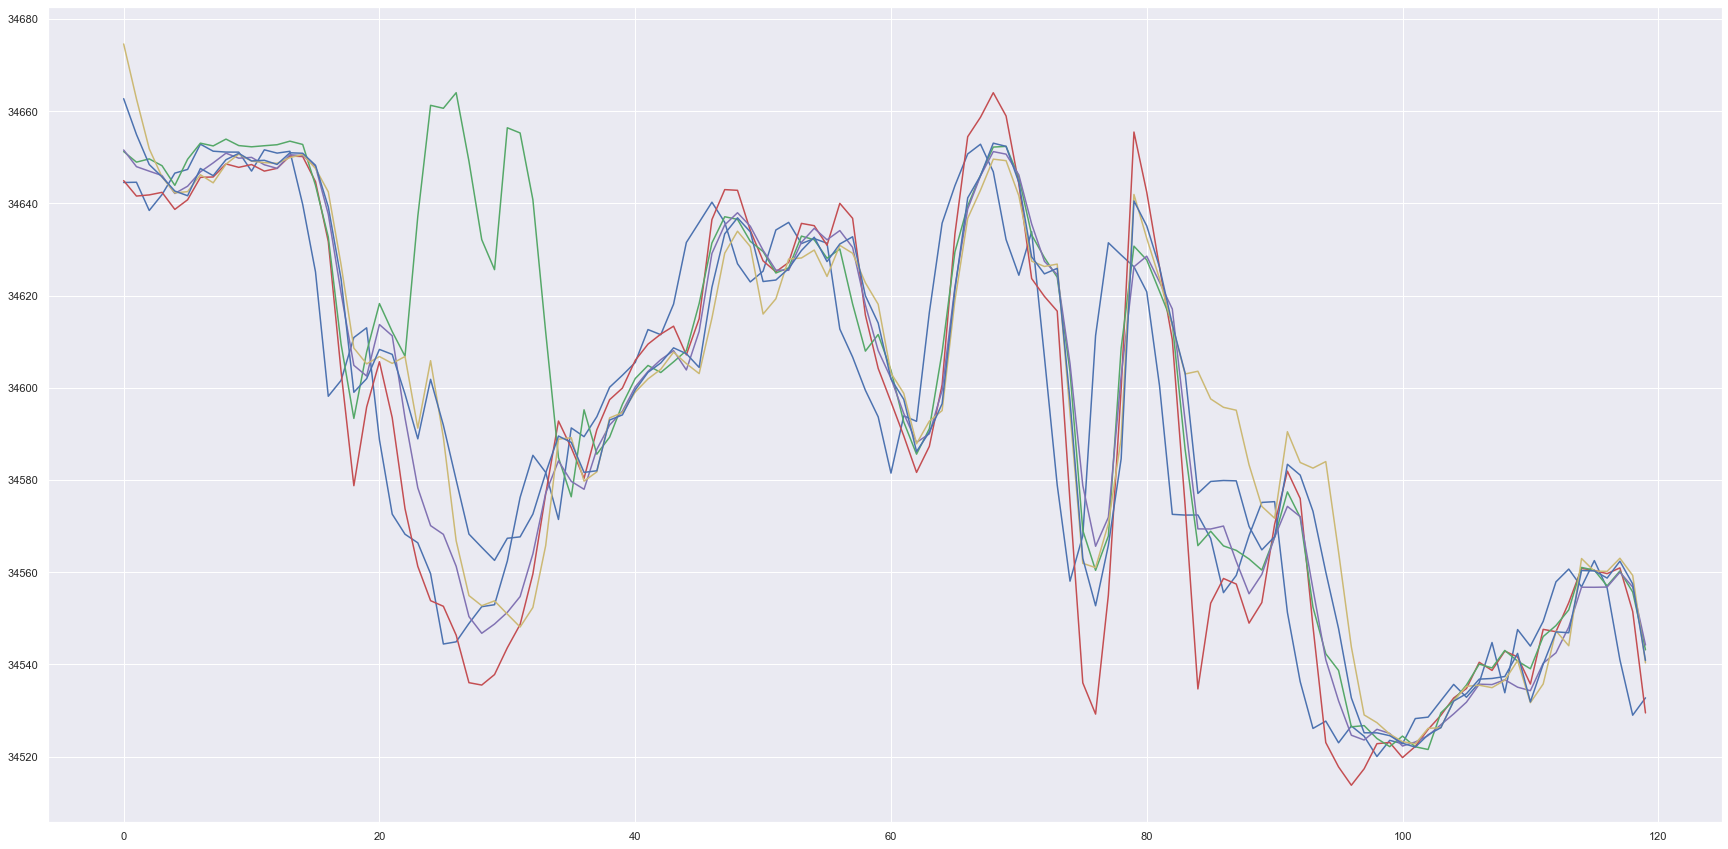

In [13]:
# plot forecasts against actual outcomes
plt.figure(figsize=(30,15))
plt.plot(all_models_df["price_avg"])
plt.plot(all_models_df["arima"], color='r')
plt.plot(all_models_df["varmax"], color='g')
plt.plot(all_models_df["ses"], color='m')
plt.plot(all_models_df["rf"], color='y')
plt.plot(all_models_df["overall"], color='b')
plt.show()